In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
df = pd.read_csv(".csv")

numerical_features = [
    '10th_percent', '12th_percent', 'jee_rank', 'experience', 'experience_field',
    'num_projects', 'num_internships', 'soft_skill_rating', 'aptitude_rating',
    'dsa_level', 'num_hackathons', 'competitive_coding_solved', 'num_repos',
    'github_activities', 'linkedin_posts', 'num_certifications', 'cgpa'
]

categorical_features = ['expertise_level', 'gender', 'domain', 'referral']

target_tier = 'college_tier_encoded'
target_name = 'college_name_encoded'
target_branch = 'college_branch_encoded'
target_salary = 'expected_salary'

X = df[numerical_features + categorical_features]
y_tier = df[[target_tier]]
y_name = df[[target_name]]
y_branch = df[[target_branch]]
y_salary = df[[target_salary]]


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_student_data.csv'

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline_tier = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

pipeline_name = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

pipeline_branch = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

pipeline_salary = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor())
])


In [ ]:
X_train, X_test, y_tier_train, y_tier_test = train_test_split(X, y_tier, test_size=0.2, random_state=42)
_, _, y_name_train, y_name_test = train_test_split(X, y_name, test_size=0.2, random_state=42)
_, _, y_branch_train, y_branch_test = train_test_split(X, y_branch, test_size=0.2, random_state=42)
_, _, y_salary_train, y_salary_test = train_test_split(X, y_salary, test_size=0.2, random_state=42)

pipeline_tier.fit(X_train, y_tier_train)
pipeline_name.fit(X_train, y_name_train)
pipeline_branch.fit(X_train, y_branch_train)
pipeline_salary.fit(X_train, y_salary_train)

joblib.dump(pipeline_tier, "best_tier_model.pkl")
joblib.dump(pipeline_name, "best_name_model.pkl")
joblib.dump(pipeline_branch, "best_branch_model.pkl")
joblib.dump(pipeline_salary, "best_salary_model.pkl")


In [ ]:
best_tier_model = joblib.load("best_tier_model.pkl")
best_name_model = joblib.load("best_name_model.pkl")
best_branch_model = joblib.load("best_branch_model.pkl")
best_salary_model = joblib.load("best_salary_model.pkl")


In [ ]:
name_encoder = LabelEncoder()
branch_encoder = LabelEncoder()
df['college_name_encoded'] = name_encoder.fit_transform(df['college_name'])
df['college_branch_encoded'] = branch_encoder.fit_transform(df['college_branch'])

college_hierarchy = ['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1']


Training College Tier...


c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


→ Tier best params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 500}
Training College Name...


c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:34:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


→ Name best params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 1000}
Training Branch...


c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:35:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


→ Branch best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}
Training Salary...
→ Salary best params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 800}


Tier Acc: 99.60%
                            precision    recall  f1-score   support

            Tier 4 - Other       1.00      0.98      0.99       102
    Tier 3 - Private/State       0.99      0.99      0.99       189
     Tier 2 - Mid Colleges       1.00      1.00      1.00       447
Tier 1 - Other IIT/Top NIT       1.00      1.00      1.00       228
          Tier 1 - Top IIT       1.00      0.97      0.99        34

                  accuracy                           1.00      1000
                 macro avg       1.00      0.99      0.99      1000
              weighted avg       1.00      1.00      1.00      1000



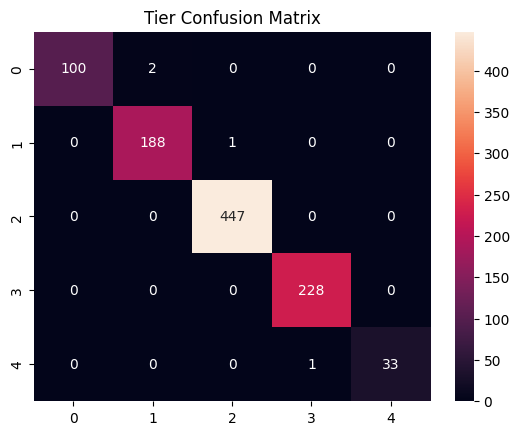

Name Acc: 19.60%
                             precision    recall  f1-score   support

                  BIT Mesra       0.10      0.09      0.09        45
          Community College       0.25      0.10      0.14        10
                  DTU Delhi       0.11      0.10      0.11        77
             IIIT Bangalore       0.10      0.05      0.07        77
             IIIT Hyderabad       0.08      0.05      0.06        19
                 IIT Bombay       0.38      0.46      0.41        13
                  IIT Delhi       0.29      0.29      0.29        14
               IIT Guwahati       0.18      0.26      0.21        43
              IIT Hyderabad       0.23      0.10      0.14        29
                 IIT Kanpur       0.00      0.00      0.00         3
              IIT Kharagpur       0.00      0.00      0.00         1
                 IIT Madras       0.00      0.00      0.00         3
                IIT Roorkee       0.23      0.30      0.26        50
        Jadavpur

c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

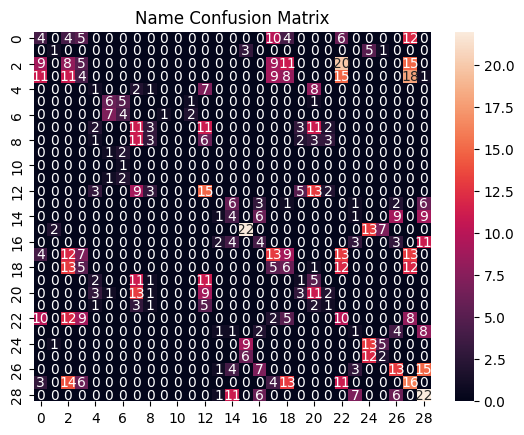

Branch Acc: 100.00%
              precision    recall  f1-score   support

         CSE       1.00      1.00      1.00       280
         ECE       1.00      1.00      1.00       227
          EE       1.00      1.00      1.00       155
          ME       1.00      1.00      1.00       198
       Other       1.00      1.00      1.00       140

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



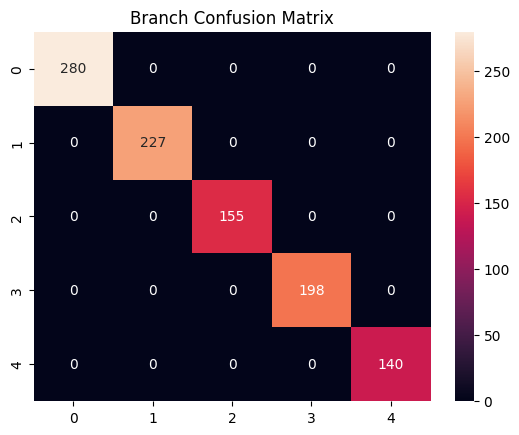

Salary MAE: ₹41,694
Salary RMSE: ₹66,229
Salary R²: 99.08%


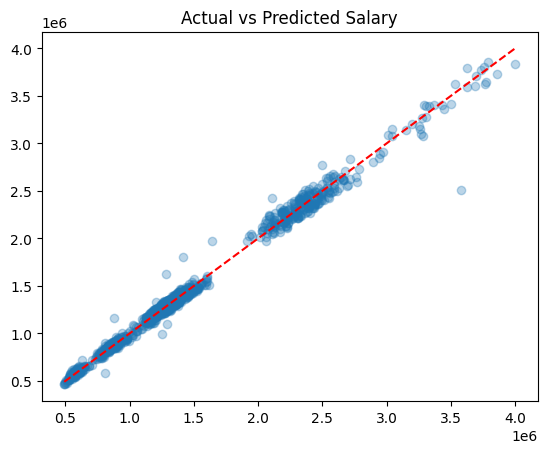

In [8]:
def evaluate_models():
    # Tier
    p_t = best_tier_model.predict(X_test)
    print(f"Tier Acc: {accuracy_score(yt_test,p_t):.2%}")
    print(classification_report(yt_test,p_t,target_names=college_hierarchy))
    sns.heatmap(confusion_matrix(yt_test, p_t), annot=True, fmt='d')
    plt.title("Tier Confusion Matrix")
    plt.show()

    # Name
    p_n = best_name_model.predict(X_test)
    names = name_encoder.categories_[0]
    print(f"Name Acc: {accuracy_score(yn_test,p_n):.2%}")
    print(classification_report(yn_test,p_n,target_names=names))
    sns.heatmap(confusion_matrix(yn_test, p_n), annot=True, fmt='d')
    plt.title("Name Confusion Matrix")
    plt.show()

    # Branch
    p_b = best_branch_model.predict(X_test)
    branches = branch_encoder.categories_[0]
    print(f"Branch Acc: {accuracy_score(yb_test,p_b):.2%}")
    print(classification_report(yb_test,p_b,target_names=branches))
    sns.heatmap(confusion_matrix(yb_test, p_b), annot=True, fmt='d')
    plt.title("Branch Confusion Matrix")
    plt.show()

    # Salary
    p_s = best_salary_model.predict(X_test)
    print(f"Salary MAE: ₹{mean_absolute_error(ys_test,p_s):,.0f}")
    print(f"Salary RMSE: ₹{np.sqrt(mean_squared_error(ys_test,p_s)):,.0f}")
    print(f"Salary R²: {r2_score(ys_test,p_s):.2%}")
    plt.scatter(ys_test, p_s, alpha=0.3)
    plt.plot([ys_test.min(), ys_test.max()], [ys_test.min(), ys_test.max()], 'r--')
    plt.title("Actual vs Predicted Salary")
    plt.show()

evaluate_models()


In [ ]:
tenth = widgets.FloatSlider(description="10th %", min=0, max=100, step=0.1)
twelfth = widgets.FloatSlider(description="12th %", min=0, max=100, step=0.1)
jee = widgets.IntSlider(description="JEE Rank", min=1, max=300000, step=1)
workexp = widgets.IntSlider(description="Work Exp", min=0, max=10)
fexp = widgets.IntSlider(description="Field Exp", min=0, max=10)
proj = widgets.IntSlider(description="Projects", min=0, max=20)
exp_lev = widgets.Dropdown(options=['Beginner', 'Intermediate', 'Advanced'], description="Expertise")
intern = widgets.IntSlider(description="Internships", min=0, max=10)
soft = widgets.FloatSlider(description="Soft Skills", min=1, max=5, step=0.1)
apt = widgets.FloatSlider(description="Aptitude", min=1, max=5, step=0.1)
dsa = widgets.FloatSlider(description="DSA Level", min=1, max=5, step=0.1)
hack = widgets.IntSlider(description="Hackathons", min=0, max=10)
codeqs = widgets.IntSlider(description="Coding Qs", min=0, max=1000)
repos = widgets.IntSlider(description="Repos", min=0, max=50)
ghacts = widgets.IntSlider(description="GitHub Acts", min=0, max=500)
li = widgets.IntSlider(description="LinkedIn Posts", min=0, max=100)
certs = widgets.IntSlider(description="Certifications", min=0, max=20)
cgpa = widgets.FloatSlider(description="CGPA", min=0, max=10, step=0.01)
gender = widgets.Dropdown(options=['Male', 'Female', 'Other'], description="Gender")
domain = widgets.Dropdown(options=['CSE', 'ECE', 'EEE', 'ME', 'CE'], description="Domain")
ref = widgets.Dropdown(options=['Yes', 'No'], description="Referral")


In [ ]:
out = widgets.Output()

def on_click(b):
    with out:
        clear_output()
        data = {
            '10th_percent': tenth.value,
            '12th_percent': twelfth.value,
            'jee_rank': jee.value,
            'experience': workexp.value,
            'experience_field': fexp.value,
            'num_projects': proj.value,
            'expertise_level': exp_lev.value,
            'num_internships': intern.value,
            'soft_skill_rating': soft.value,
            'aptitude_rating': apt.value,
            'dsa_level': dsa.value,
            'num_hackathons': hack.value,
            'competitive_coding_solved': codeqs.value,
            'num_repos': repos.value,
            'github_activities': ghacts.value,
            'linkedin_posts': li.value,
            'num_certifications': certs.value,
            'cgpa': cgpa.value,
            'gender': gender.value,
            'domain': domain.value,
            'referral': ref.value
        }

        df_input = pd.DataFrame([data])[numerical_features + categorical_features]  # ✅ FIXED LINE

        try:
            t = best_tier_model.predict(df_input)[0]
            n = best_name_model.predict(df_input)[0]
            b = best_branch_model.predict(df_input)[0]
            s = best_salary_model.predict(df_input)[0]

            print(f"Tier   : {college_hierarchy[int(t)]}")
            print(f"Name   : {name_encoder.inverse_transform([[n]])[0][0]}")
            print(f"Branch : {branch_encoder.inverse_transform([[b]])[0][0]}")
            print(f"Salary : ₹{s:,.2f}")
        except Exception as e:
            print("⚠️ Error during prediction:", e)

btn = widgets.Button(description="Predict")
btn.on_click(on_click)


✅ All models, encoders, and preprocessor saved successfully.
